Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Alex Arzamasov"
COLLABORATORS = "Tianbo Qi, Abeera Mehmood, Eileen Tang, Catherine Schrankel"

---

# Homework 4: Data Analysis and Plotting in R
Curated by Sabah Ul-Hasan, Karthik Gangavarapu, Shang-Fu Chen, Huitian Dao, and Andrew Su

Complete homework is due every Tuesday at 8 AM PST. <br>
Save your homework as you go, so the efforts don't get lost. <br>
Note there are up 12 points, but you can only receive 10 points total for homework.

In this assignment, you will <br>
A4.aa Solidfy your understanding of R syntax and loops <br>
A4.ab Explore basic data analysis in R <br>
A4.ba Create R scripts that output figures based on data analysis <br>
A4.bb Solidfy your understanding of data analysis and visualizatoin in R by practice

Note that there is a section at the end (A4.bb) to point out any enhancements you personally would make to this assignment if you were to lead the course. 


<font color = 'red' size = "4"><b>NOTE: Execute the code cell below to import the `testthat` library before you started working on the questions.</b></font>

In [2]:
# Import the required R library for test case and autograding
library(testthat)

## A4.aa: Solidfy your understanding of R syntax and loops [20-30 min] Group of 3 

### Question 1 (1 point)

1. Code review: Take turns briefly talking through your code and process (3-5 min), then spend the remaining time discussing the different approaches you may have taken to get to the same end-goal. What were the interesting aspects you learned from each other? Share your notes below. Include your assessment of how loops compare in bash vs R.  
1. For the last 5 minutes on your own, think of a suggestion of something you would've liked to learn in relation to these topics that we didn't cover.

1. Syntax differences in loops and conditions between bash and R:
    - generally, in bash, indentation always matters, and brackets are not needed. In R, it is the opposite
    - for do/done syntax is used in bash loops, whereas for {} is used in R loops
    - if/then, elif/then, fi are used in bash conditions, whereas if {}, else if {}, else {} are used in R conditions
    - `strsplit()` and `unlist()`
    - Best practices for writing R code
2. Working with RStudio

## A4.ab: Explore basic data analysis in R [20-30 min] Individual
#### ab.i Uploading and exploring your data<br>

### Question 2 (1 point)

1. Using R script, read the `NAV-D14_DEseq2.csv` file into your notebook as `nav.d14`, save the first 6 rows of the dataframe to a variable named `nav.d14.6` 
1. Sort the full dataframe by ascending __adjusted__ $p$-value, save the top 10 rows to `nav.d14.sorted.padj.10`  
1. How big is the dataframe? Save your answer to `nav.d14.shape`  

_(Hint: `read.csv()`, `read.table()`, `head()`, `order()`, `dim()`)_  

In [3]:
setwd("/home_local/aarzamasov/HW4/data")

nav.d14 <- read.csv("NAV-D14_DEseq2.csv", header = TRUE)
nav.d14.6 <- head(nav.d14, n=6L)
nav.d14.sorted.padj.10 <- head((nav.d14[order(nav.d14$padj),]), n=10L) 
nav.d14.shape <- dim(nav.d14)

nav.d14.6 # display your answer 1
nav.d14.sorted.padj.10 # display your answer 2
nav.d14.shape # display your answer 3

,gene.name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,25.256745,1.30246882,0.4166710,3.1258926,1.772662e-03,8.209295e-03
2,TNMD,0.288508,-0.05077872,0.4875003,-0.1041614,9.170413e-01,NA
3,DPM1,163.507773,-0.05502833,0.2492486,-0.2207769,8.252662e-01,9.144493e-01
4,SCYL3,296.461713,0.27370099,0.1964251,1.3934117,1.634953e-01,3.312390e-01
5,C1orf112,199.011986,-1.62012005,0.2833121,-5.7184998,1.070000e-08,1.590000e-07
6,FGR,122.792530,-5.60936805,0.6378324,-8.7944226,1.440000e-18,7.150000e-17


,gene.name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
469,TNFRSF1B,542.82545,-3.406411,0.2267235,-15.024517,5.07e-51,3.25e-48
394,CD74,2666.66747,-3.133593,0.2146900,-14.595896,2.98e-48,1.54e-45
460,SLAMF7,796.08484,-5.924170,0.4107372,-14.423262,3.69e-47,1.85e-44
298,ANLN,86.61972,-4.292672,0.3590313,-11.956260,6.02e-33,1.02e-30
197,E2F2,56.39916,-5.011194,0.4223203,-11.865862,1.78e-32,2.95e-30
76,SLC25A5,839.58682,-1.630522,0.1549378,-10.523717,6.72e-26,6.58e-24
482,HMGB3,84.36925,-4.387288,0.4200637,-10.444341,1.56e-25,1.45e-23
51,CD38,651.92593,-2.934379,0.2850409,-10.294588,7.45e-25,6.55e-23
319,ELOVL5,602.36494,-1.761169,0.1792978,-9.822591,9.00e-23,6.50e-21


[1] 500   7

In [4]:
test_that("A1 should be a dataframe", {
    expect_that(nav.d14.6, is_a("data.frame"))
})

In [5]:
test_that("A2 should be a dataframe", {
    expect_that(nav.d14.sorted.padj.10, is_a("data.frame"))
})
test_that("A2 should have more rows than A1", {
    expect_that(length(rownames(nav.d14.sorted.padj.10)) > length(rownames(nav.d14.6)), is_true())
})

In [6]:
test_that("A3 should have 2 values", {
    expect_that(length(nav.d14.shape) == 2, is_true())
})

#### ab.ii Analyzing and appending your data

### Question 3 (1 point)

1. Create a function named `pType` to retun the type of $p$-value by following rules.
```ruby
# p-value types
missing : NA
p > 0.05 : 'n.s.'
0.05 >= p > 0.01 : '*'
0.01 >= p > 0.001 : '**'
0.001 >= p > 0.0001 : '***'
0.0001 >= p : '****'
``` 
2. Use `pType` with `lapply` to get the type of all values in the $p$-value column (not `padj`) in `nav.d14`. Save the summary counts of each type (as factors) to `nav.d14.summary` 
3. Assign types of $p$-value to a new column named `ptype` to the same dataframe. (Note: you might have to reload the csv file as Question 1, if you accidentally edit the dataframe in a wrong way.)  
_(Hint: `lapply()`, `factor()`, `unlist()`, `summary()`)_

In [7]:
pType <- function(pvalue){
    # the function first checks if the value of the argument is NA 
    if (is.na(pvalue) == TRUE) {
        significance <- NA
    # if the value of the argument is not NA (numeric), the function proceeds to compare it with references
    } else {
        if (0.05 < pvalue) {
            significance <- 'n.s.'
        } else if (0.01 < pvalue & pvalue <= 0.05){
            significance <- '*'
        } else if (0.001 < pvalue & pvalue <= 0.01){
            significance <- '**'
        } else if (0.0001 < pvalue & pvalue <= 0.001){
            significance <- '***'
        } else {
            significance <- '****'
        }
        }
}

# takes all p-values from nav.d14 and applies the function pType to each value
ptype <- sapply(nav.d14$pvalue, pType)
# saves all values in ptype as factors to a new vector
ptype_factor <- factor(ptype)
# crates a vector with summary of ptype_factor
nav.d14.summary <- summary(ptype_factor)

# adds the new column "ptype" with values of ptype_factor to nav.d14
nav.d14$ptype <- ptype_factor

nav.d14.summary# display A2
head(nav.d14) # display partial A3    

*   **  *** **** n.s. NA's 
  37   34   25   93  306    5

,gene.name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ptype
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,TSPAN6,25.256745,1.30246882,0.4166710,3.1258926,1.772662e-03,8.209295e-03,**
2,TNMD,0.288508,-0.05077872,0.4875003,-0.1041614,9.170413e-01,NA,n.s.
3,DPM1,163.507773,-0.05502833,0.2492486,-0.2207769,8.252662e-01,9.144493e-01,n.s.
4,SCYL3,296.461713,0.27370099,0.1964251,1.3934117,1.634953e-01,3.312390e-01,n.s.
5,C1orf112,199.011986,-1.62012005,0.2833121,-5.7184998,1.070000e-08,1.590000e-07,****
6,FGR,122.792530,-5.60936805,0.6378324,-8.7944226,1.440000e-18,7.150000e-17,****


In [8]:
test_that("test missing p-value", {
    expect_that(pType(NA), is_a("logical"))
})
test_that("test p-values", {
    expect_that(all(pType(0.1) == 'n.s.', pType(0.05) == '*', 
                    pType(0.01) == '**', pType(0.001) == '***', 
                    pType(0.0001) == '****'), is_true())
})

In [9]:
test_that("A1: test type counts in the summary", {
    expect_that(all(nav.d14.summary[['NA\'s']] == 5, 
                    nav.d14.summary[['n.s.']] == 306, 
                    nav.d14.summary[['****']] == 93,
                    nav.d14.summary[['***']] == 25,
                    nav.d14.summary[['**']] == 34,
                    nav.d14.summary[['*']] == 37
                   ), is_true())
})

In [10]:
test_that("A2: test the shape of the result dataframe", {
    expect_that(all(dim(nav.d14) == c(500, 8)), is_true())
})
test_that("A2: test the first 10 components in the ptype column", {
    expect_that(all(nav.d14$ptype[1:10] == c('**', 'n.s.', 'n.s.', 'n.s.', '****', 
                                             '****', 'n.s.', '**', '**', 'n.s.')), is_true())
})

4. Describe how a function works. What is the distinction between creating your own function versus the ones already included in base R?

1. The explanation is inside the code (comments)
2. The main distinction between functions included in base R and your functions is that you have to include the code of your function in each script where you plan to use it

### Question 4 (1 point)

How do we know what a function is doing? For example, what are the parameters of the built-in R function `sqrt()` that result in the squareroot of any given input number? Write the breakdown of this specifc base R arithmatic function as if you were to create it from scratch. Include comments in your code of what is happening line-by-line with a test that it print the same output as you would in base R at the end.  
_(Hint: You should consider any type of input and special return for a few magic numbers if needed.)_

In [11]:
square_root <- function(a) {
    # check that input is numeric; if FALSE, return error
    if (is.numeric(a) == FALSE) {
        return("non-numeric argument to mathematical function")
    } else {
        # check for negative numbers in input; if TRUE, return NanN
        if (a < 0) {
            return(NaN)
        # check for 0 in input (otherwise we would divide by zero in the Newton’s method); if TRUE, return 0
        } else if (a == 0){
             return(0)
        # use the Newton’s method for square root calculation (found on the Internet)
        } else {
            x <- a/2
            while (TRUE) {
                y <- (x + a / x) / 2
                if (y == x) break
                x <- y
            } 
            return(y)
        }
    }
}

square_root(49)
sqrt(49)

# sqrt() accepts the numeric, vector, or array x and calculates the square root
# sqrt() displays certain warning messages when input is non-numeric or negative
# square_root() produces some warning messages when vector is used as input, but the result is the same

[1] 7

[1] 7

#### ab.iii Understanding functions, tests, and loops by practice (on your own time)


### Question 5 (1 point)


1. Follow and complete the two tutorials. Use this space to take notes of what you learned <br>
https://swcarpentry.github.io/r-novice-inflammation/02-func-R/index.html <br>
https://swcarpentry.github.io/r-novice-inflammation/03-loops-R/index.html
1. Reflections: On an integer scale of `1-5`, `1` being very easy and `5` being the most difficult, where would you rank today's exercises? Provide brief notes on what was easy vs difficult, and why. <br>


1. Notes:
    - R automatically returns whichever variable is on the last line of the body of the function
    - functions can be nested: `celsius_to_kelvin(fahrenheit_to_celsius(32.0))`
    - A `for` loop is used to apply the same function calls to a collection of objects. R has a family of functions, the `apply` family, which can be used in much the same way
2. I would rate them 5/5. Question 3 and particularly Question 4 took much time to complete. Honestly, to me, it seems that unlike Question 3, Question 4 in the current form (algorithmic part) belongs to a computer science course

## A4.ba: Create R scripts that output figures based on data analysis [20-30 min] TPS

### Question 6 (1 point) [15 min on your own]

Load the `games.csv` dataset. Make a scatter plot including legend as below - to visualize the rating between charcoal vs cream, color by winner side.  

<img src="data/A4_Q6.png" style="width: 500px;">

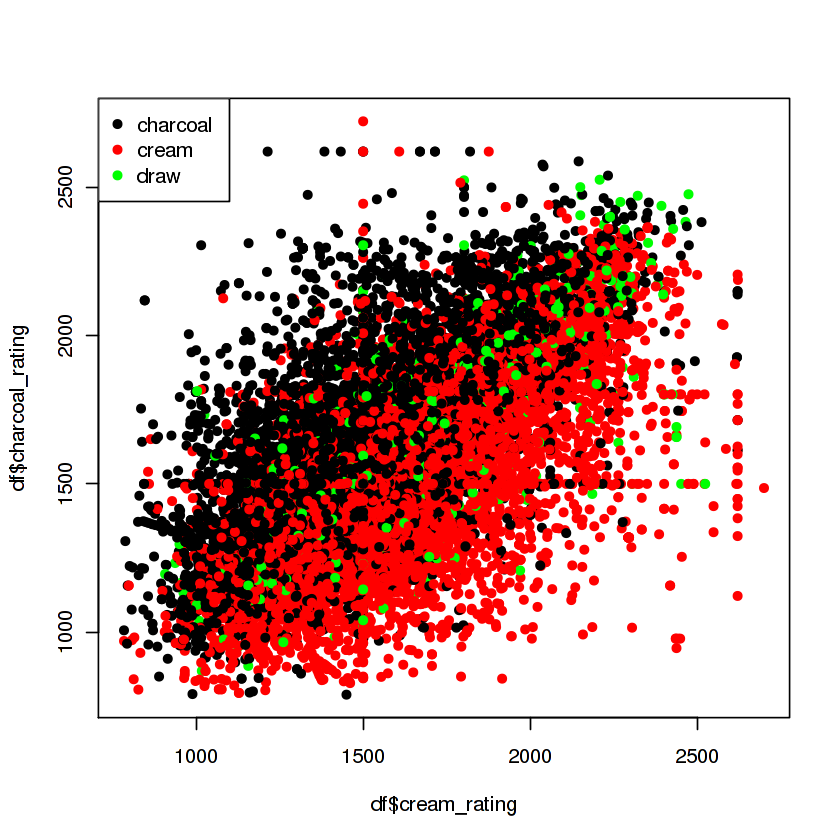

In [12]:
df <- read.csv("games.csv", header = TRUE)
plot(df$cream_rating, df$charcoal_rating, col=c("black","red","green")[df$winner], pch = 16)
legend("topleft", legend=c("charcoal", "cream", "draw"), col=c("black","red","green"), pch=c(16,16,16))

### Question 7 (1 point) [15 min together] 

Discuss and compare your scripts, troubelshoot together. Write down your findings.

- `plot` is used to build scatterplots
- `legend` is used for adding a legend to a plot
- `"topleft"` specifies the posision of the legend
- dot colors can be specified using a vector `col=c("black","red","green")` addressing a specific column with factor values `[df$winner]`
- `pch` specifies the dot shape 

### A4.bb Solidfy your understanding by practice [20-30 min] Individual

### Question 8 (1 point)

Make a bar chart as below - showing the number of rated vs unrated games.

<img src="data/A4_Q8.png" style="width: 500px;">

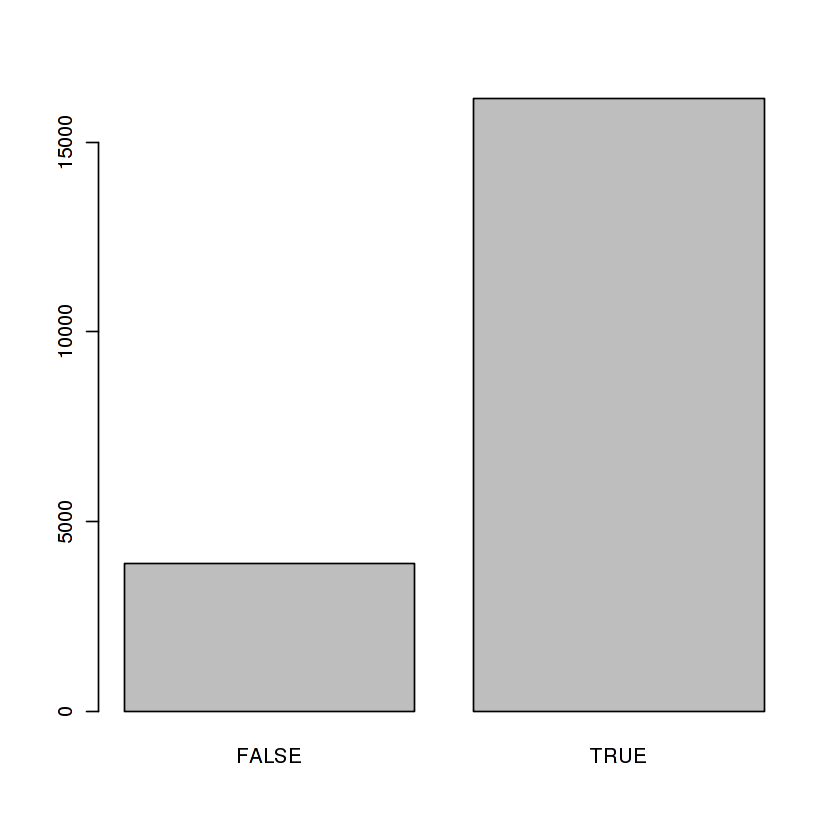

In [13]:
chess_games <- table(df$rated) # barplot accepts matrix as input
barplot(chess_games)

### Question 9 (1 point)

Make a stacked bar chart as below - futher coloring the bar by winner side.

<img src="data/A4_Q9.png" style="width: 500px;">

[1] "charcoal" "cream"    "draw"

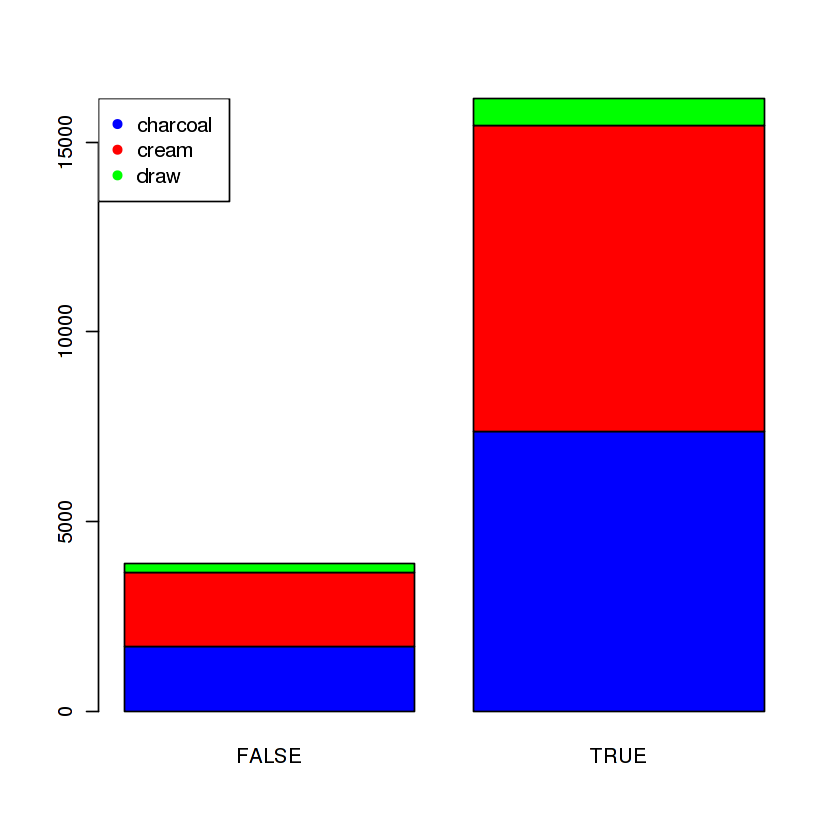

In [14]:
df_short <- df[c("winner", "rated")]
df_short2 <- as.matrix(table(df_short))
rownames(df_short2)
barplot(df_short2, col=c("blue","red","green"))
legend("topleft", legend=rownames(df_short2), col=c("blue","red","green"), pch=c(16,16,16))

### Question 10 (1 point)

Make a boxplot as below - to see what type of victory __for cream__ had the highest median `cream_rating`?

<img src="data/A4_Q10.png" style="width: 500px;">

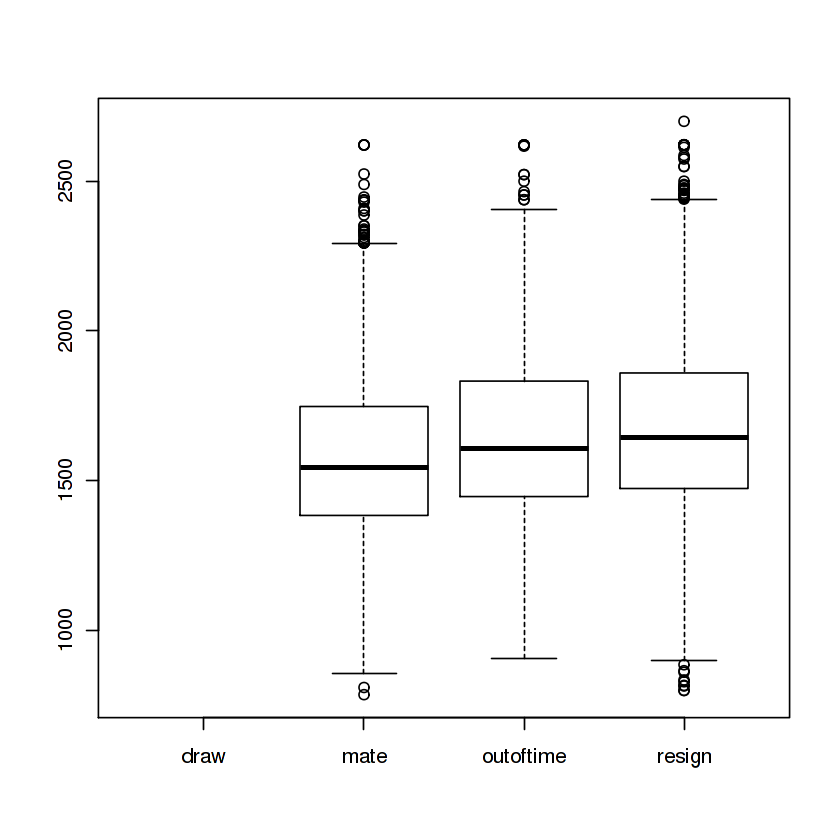

In [24]:
df_cream_rating_subset <- subset(df, winner == "cream")
boxplot(df_cream_rating_subset$cream_rating ~ df_cream_rating_subset$victory_status)
# resign has the highest median

### Question 11 (1 point)

Advanced: Integrate your understanding of how to create function to output the plots in Question 8-10 as one. Make the 3 figures (no need to be a grid plot) by a customized function.  


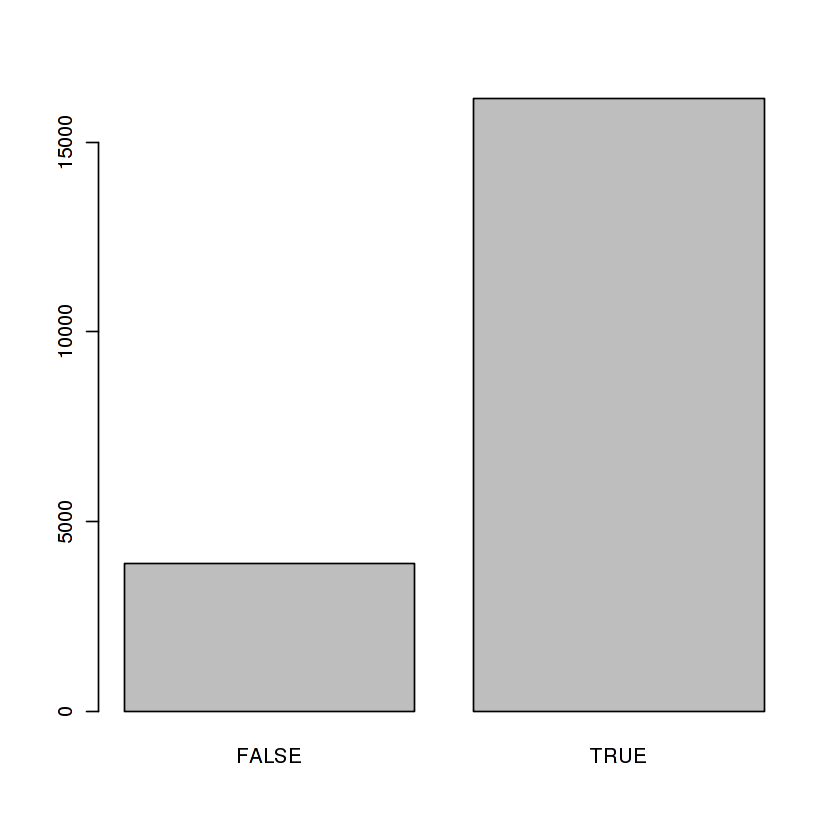

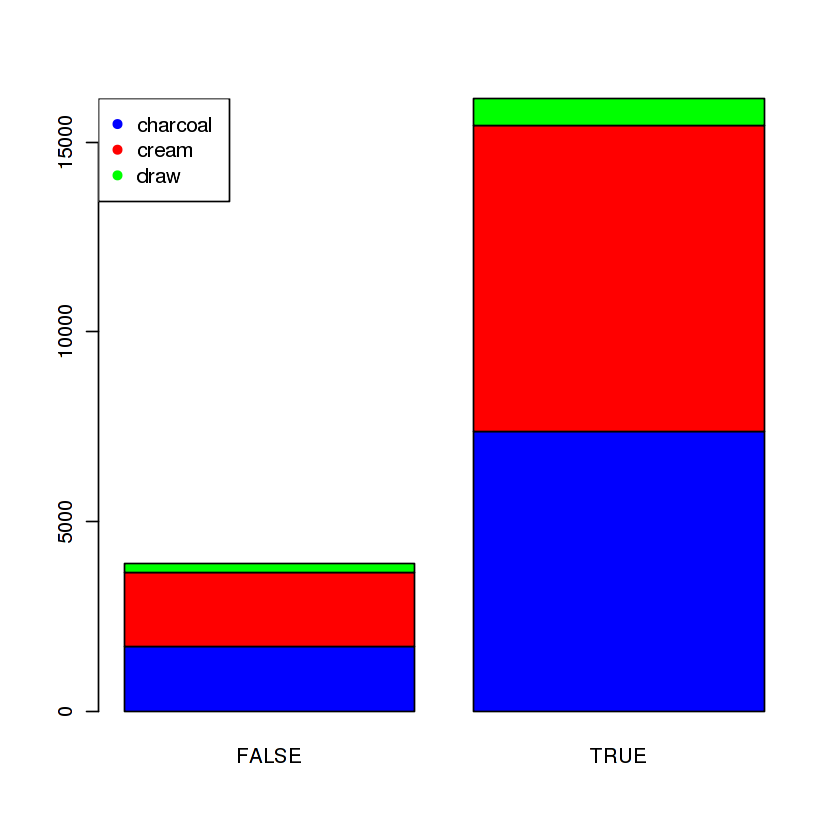

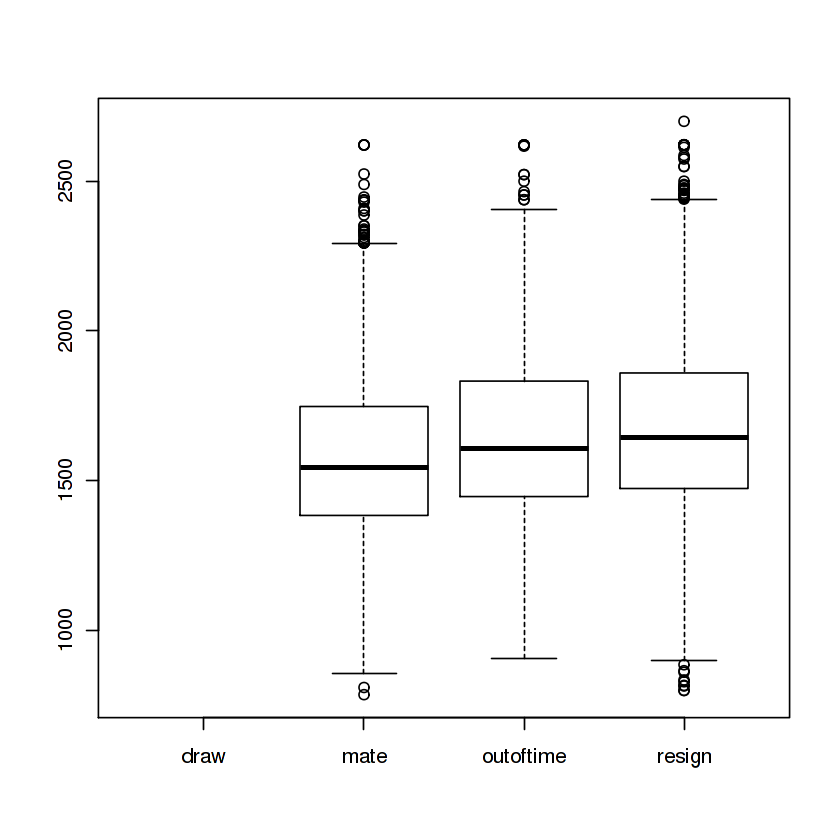

In [21]:
# this function as input: (i) a data_frame, (ii) column names as strings, (iii) a string for subseting data ("subset_value")
# then it plots two barplots and one boxplot
make_plots <- function(data_frame, column1, column2, column3, column4, subset_value){
   
    #make barplot 1
    barplot_data1 <- table(df[,column2])
    barplot(barplot_data1)
    
    #make barplot 2
    barplot_data2 <- data_frame[c(column1, column2)]
    barplot_data2_mat <- as.matrix(table(barplot_data2))
    barplot(barplot_data2_mat, col=c("blue","red","green"))
    legend("topleft", legend=rownames(barplot_data2_mat), col=c("blue","red","green"), pch=c(16,16,16))
    
    #make boxplot 1
    boxplot_data1 <- subset(data_frame, data_frame[,column1] == subset_value)
    boxplot(boxplot_data1[,column3] ~ boxplot_data1[,column4])
    }s

make_plots(df, column1 = "winner", column2 = "rated", column3 = "cream_rating", column4 = "victory_status", subset_value = "cream")

### Question 12 (1 point)

1. Reflections: On an integer scale of `1-5`, `1` being very easy and `5` being the most difficult, where would you rank the A1.bb assignment and why? Include some notes about what you gained from this past week that you didn't know before as well as notes of things you already knew.

1. Improvements: Notice a [potentially intentional] mistake, or an area of this homework that could have been improved? Include your thoughts here. 

1. Reflections: 
    - 4/5. Plotting functions using basic R seems less intuitive than plotting using ggplot2 (especially because ggplot2 allows easier aggregation). Overall, data aggregation is the hardest part for me 
    - Most of the information from the past week was new
    - Learned how to create your own functions. Very useful
    - Learned basic R plotting
2. Improvements:
    - Rephrasing question 4 would definitely help 
    - More work on data aggregation from data frames

In [17]:
df

rated,turns,victory_status,winner,increment_code,cream_rating,charcoal_rating,opening_name
<lgl>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>
FALSE,13,outoftime,cream,15+2,1500,1191,Slav Defense: Exchange Variation
TRUE,16,resign,charcoal,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
TRUE,61,mate,cream,5+10,1496,1500,King's Pawn Game: Leonardis Variation
TRUE,61,mate,cream,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
TRUE,95,mate,cream,30+3,1523,1469,Philidor Defense
FALSE,5,draw,draw,10+0,1250,1002,Sicilian Defense: Mongoose Variation
TRUE,33,resign,cream,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
FALSE,9,resign,charcoal,15+30,1413,2108,Nimzowitsch Defense: Kennedy Variation | Linksspringer Variation
TRUE,66,resign,charcoal,15+0,1439,1392,Italian Game: Schilling-Kostic Gambit
